YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


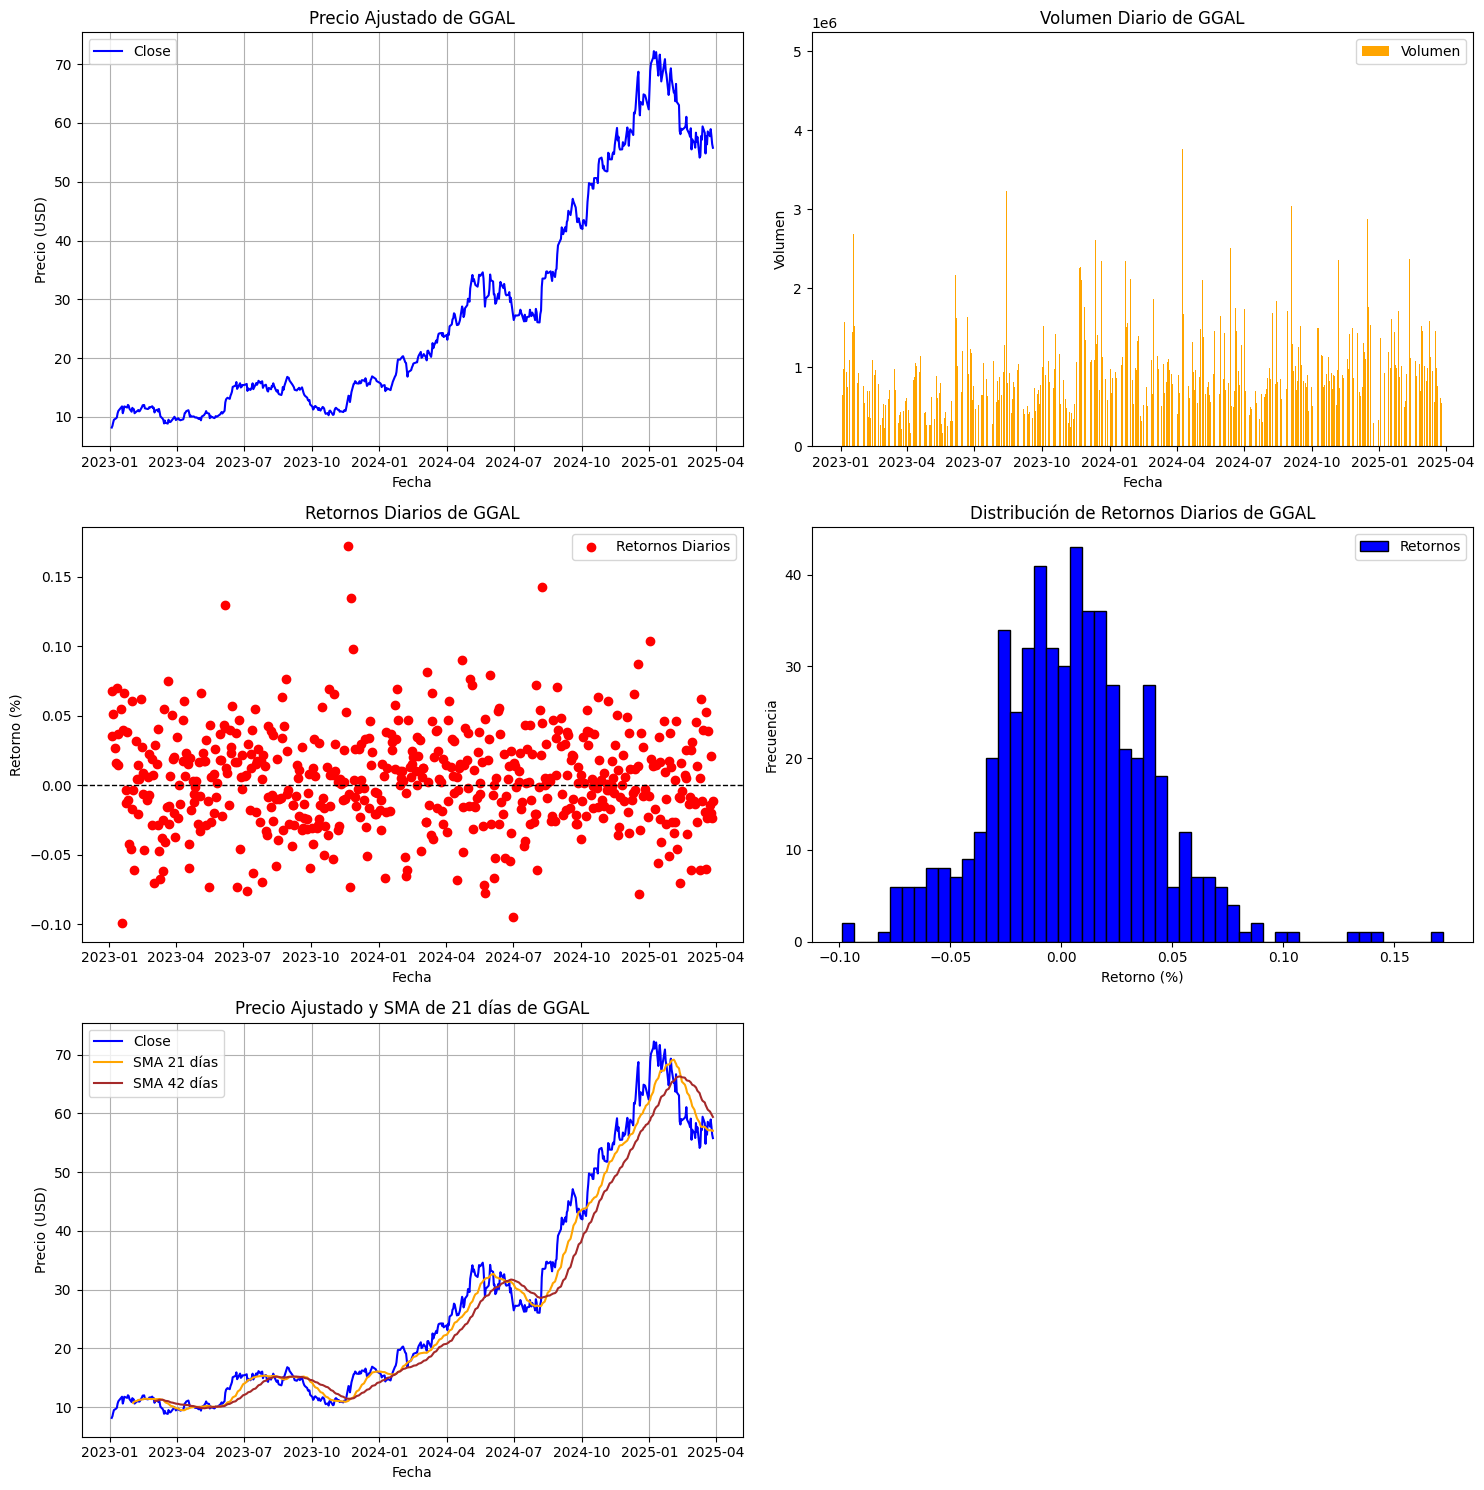

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar datos del ticker
ticker = "GGAL"  # Cambiar por el ticker deseado
data = yf.download(ticker, start="2023-01-01", end="2025-03-31", multi_level_index=False)

# Calcular métricas necesarias
data['Daily_Return'] = data['Close'].pct_change()
data['SMA_21'] = data['Close'].rolling(window=21).mean()
data['SMA_42'] = data['Close'].rolling(window=42).mean()

# Crear figura y subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # 3 filas, 2 columnas

# Gráfico de líneas: Precio ajustado
axes[0, 0].plot(data.index, data['Close'], label='Close', color='blue')
axes[0, 0].set_title(f"Precio Ajustado de {ticker}")
axes[0, 0].set_xlabel("Fecha")
axes[0, 0].set_ylabel("Precio (USD)")
axes[0, 0].legend()
axes[0, 0].grid(True)

# Gráfico de barras: Volumen
axes[0, 1].bar(data.index, data['Volume'], color='orange', label='Volumen')
axes[0, 1].set_title(f"Volumen Diario de {ticker}")
axes[0, 1].set_xlabel("Fecha")
axes[0, 1].set_ylabel("Volumen")
axes[0, 1].legend()

# Gráfico de dispersión: Retornos diarios
axes[1, 0].scatter(data.index, data['Daily_Return'], color='red', label='Retornos Diarios')
axes[1, 0].set_title(f"Retornos Diarios de {ticker}")
axes[1, 0].set_xlabel("Fecha")
axes[1, 0].set_ylabel("Retorno (%)")
axes[1, 0].axhline(0, color='black', linestyle='--', linewidth=1)  # Línea en 0
axes[1, 0].legend()

# Histograma: Distribución de retornos diarios
axes[1, 1].hist(data['Daily_Return'].dropna(), bins=50, color='blue', edgecolor='black', label='Retornos')
axes[1, 1].set_title(f"Distribución de Retornos Diarios de {ticker}")
axes[1, 1].set_xlabel("Retorno (%)")
axes[1, 1].set_ylabel("Frecuencia")
axes[1, 1].legend()

# Gráfico de líneas con SMA: Precio ajustado y media móvil
axes[2, 0].plot(data.index, data['Close'], label='Close', color='blue')
axes[2, 0].plot(data.index, data['SMA_21'], label='SMA 21 días', color='orange')
axes[2, 0].plot(data.index, data['SMA_42'], label='SMA 42 días', color='brown')
axes[2, 0].set_title(f"Precio Ajustado y SMA de 21 días de {ticker}")
axes[2, 0].set_xlabel("Fecha")
axes[2, 0].set_ylabel("Precio (USD)")
axes[2, 0].legend()
axes[2, 0].grid(True)

# Eliminar el subplot vacío
axes[2, 1].axis('off')


plt.tight_layout()


plt.show()
